In [33]:

%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random
from matplotlib import collections as matcoll
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from pylab import *
from kapteyn import kmpfit
import pylab 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

In [3]:
#Read Data into dataframe
gaugeData = pd.read_table('gauge-1wb1wa6-2gpel41.txt',delim_whitespace=True)

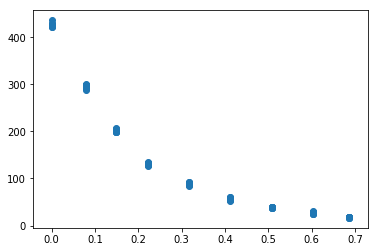

In [4]:
plt.scatter(gaugeData['density'],gaugeData['gain'])

In [5]:
#Log Transformation Gain Data
gaugeData2 = gaugeData.copy(deep = True)
gaugeData2['gain'] = gaugeData2['gain'].apply(lambda x: np.log10(x))

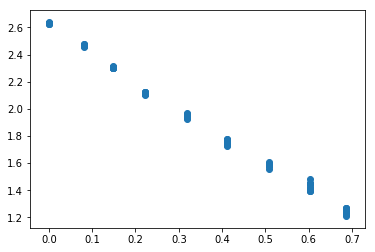

In [6]:
plt.scatter(gaugeData2['density'],gaugeData2['gain'])

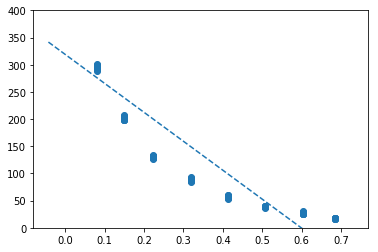

In [7]:
#Data plotted with least squares line
def line(x, m, b):
    return m*x + b
M,B = curve_fit(line, gaugeData['density'], gaugeData['gain'])[0]
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.scatter(gaugeData['density'],gaugeData['gain'])
plt.ylim(0,400)
abline(M,B)

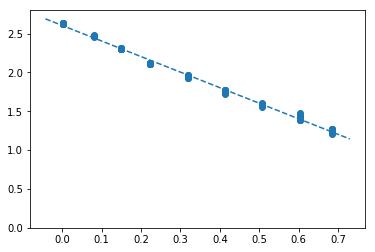

In [8]:
#Data plotted with least squares line
def line(x, m, b):
    return m*x + b
M2,B2 = curve_fit(line, gaugeData2['density'], gaugeData2['gain'])[0]
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.scatter(gaugeData2['density'],gaugeData2['gain'])
plt.ylim(0,2.8)
abline(M2,B2)

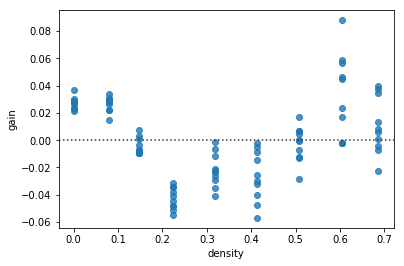

In [9]:
#log transformed residuals 
sns.residplot(gaugeData2['density'],gaugeData2['gain'])

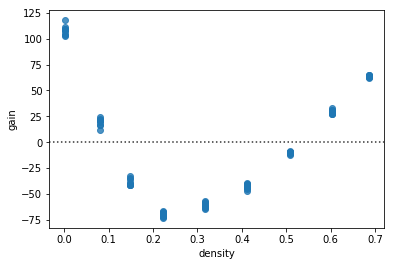

In [10]:
#Original Data Residuals
sns.residplot(gaugeData['density'],gaugeData['gain'])

In [11]:
np.correlate(gaugeData['density'],gaugeData['gain'])

array([ 1824.5634])

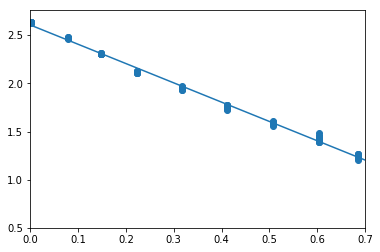

In [35]:
#Different Model:
model2 = LinearRegression(fit_intercept=True)

model2.fit(gaugeData2['density'][:, np.newaxis], gaugeData2['gain'])

xfit = np.linspace(0, 1, 10)
yfit = model2.predict(xfit[:, np.newaxis])

plt.scatter(gaugeData2['density'], gaugeData2['gain'])
plt.xlim(0,0.7)
plt.plot(xfit, yfit);

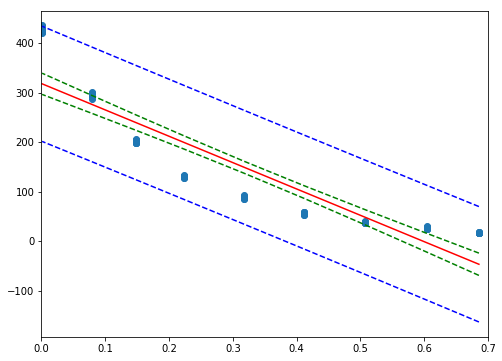

In [28]:
x = gaugeData['density']
y = gaugeData['gain']

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

st, data, ss2 = summary_table(res, alpha=0.05)
fitvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_l, predict_mean_u = data[:,4:6].T
predict_l, predict_u = data[:,6:8].T

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(X, fitvalues, 'r-', label='OLS')
ax.plot(X, predict_l, 'b--')
ax.plot(X, predict_u, 'b--')
ax.plot(X, predict_mean_l, 'g--')
ax.plot(X, predict_mean_u, 'g--')
plt.xlim(0,0.7)
plt.show()

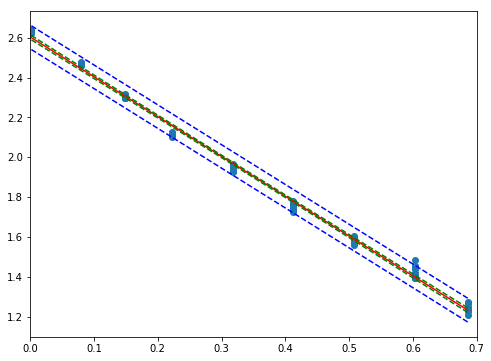

In [148]:
x = gaugeData2['density']
y = gaugeData2['gain']

X = sm.add_constant(x)
res = sm.OLS(y, X).fit()

st, data, ss2 = summary_table(res, alpha=0.05)
fitvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_l, predict_mean_u = data[:,4:6].T
predict_l, predict_u = data[:,6:8].T

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o')
ax.plot(X, fitvalues, 'r-')
ax.plot(X, predict_l, 'b--')
ax.plot(X, predict_u, 'b--')
ax.plot(X, predict_mean_l, 'g--')
ax.plot(X, predict_mean_u, 'g--')
plt.xlim(0,0.7)
plt.show()

In [161]:
# Cross Validation with 
std_error = 10**.0138181
def cross_validate(density):
    sumGain = (gaugeData2.gain[gaugeData2.density == density].sum())
    lenGain = len(gaugeData2.gain[gaugeData2.density == density])
    meanGain = sumGain/lenGain
    nDF = gaugeData2[gaugeData2.density != density]
    M3,B3 = curve_fit(line, nDF['density'], nDF['gain'])[0]
    yr = M3*density + B3
    xr = (np.log(38.6) - B3)/M3
    return xr